In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [49]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [51]:
df.shape

(366, 12)

In [53]:
df.columns = df.columns.str.strip()


In [55]:
df.dropna(subset=['winddirection', 'windspeed'], inplace=True)

In [59]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.775342,1013.764658,26.176164,23.735068,21.881644,19.973425,80.161644,71.106849,4.413699,101.506849,21.536986
std,8.828584,6.409697,5.979563,5.635701,5.596385,5.997768,10.071648,21.824024,3.938285,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.800000,17.100000,16.100000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.700000,25.400000,23.700000,21.900000,80.000000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.500000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [61]:
df['rainfall'].value_counts()

rainfall
yes    248
no     117
Name: count, dtype: int64

In [69]:
df['rainfall'] = df['rainfall'].map({'yes':1,'no':0})

In [71]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.775342,1013.764658,26.176164,23.735068,21.881644,19.973425,80.161644,71.106849,0.679452,4.413699,101.506849,21.536986
std,8.828584,6.409697,5.979563,5.635701,5.596385,5.997768,10.071648,21.824024,0.467328,3.938285,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.800000,17.100000,16.100000,75.000000,58.000000,0.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.700000,25.400000,23.700000,21.900000,80.000000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.500000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


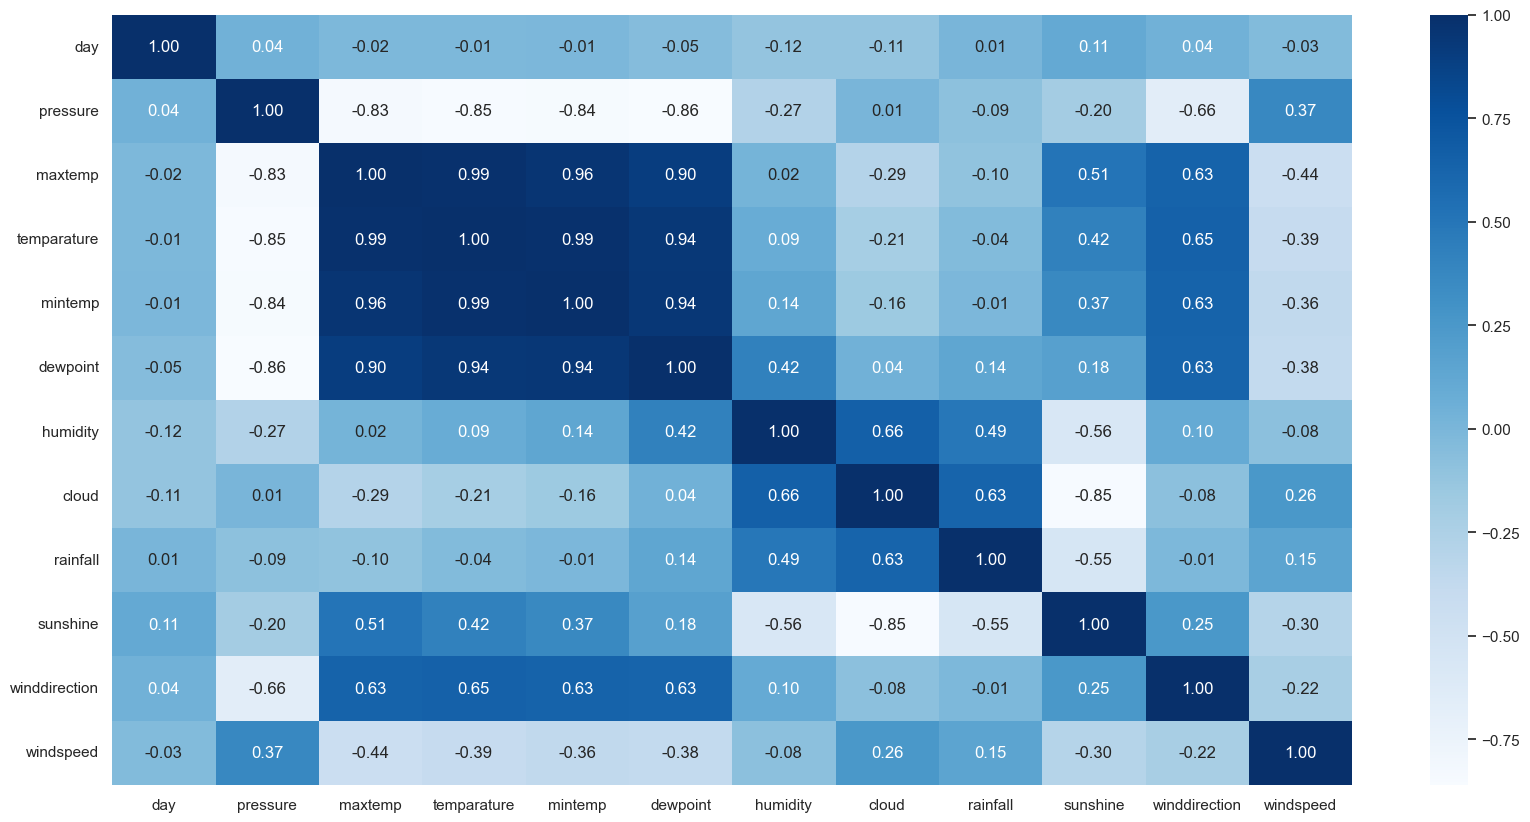

In [77]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap = 'Blues', fmt='.2f')
plt.show()

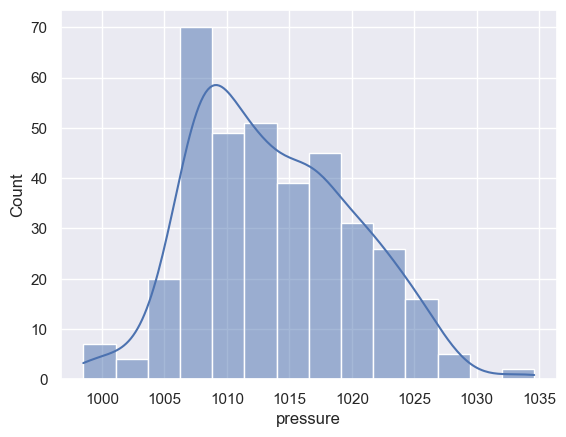

In [79]:
sns.histplot(df['pressure'], kde=True)
plt.show()

In [93]:
numerical_cols = df.columns
numerical_cols.tolist().remove('rainfall')

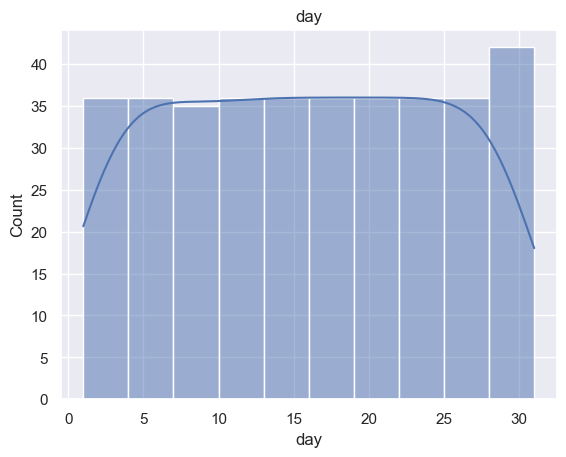

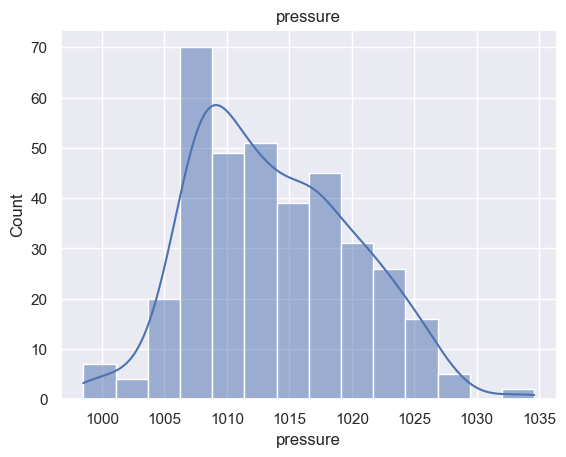

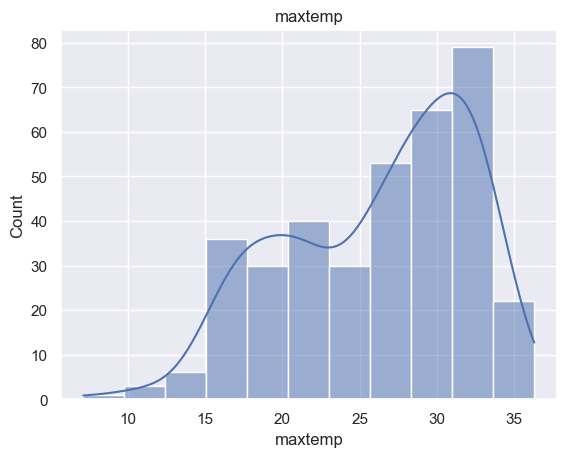

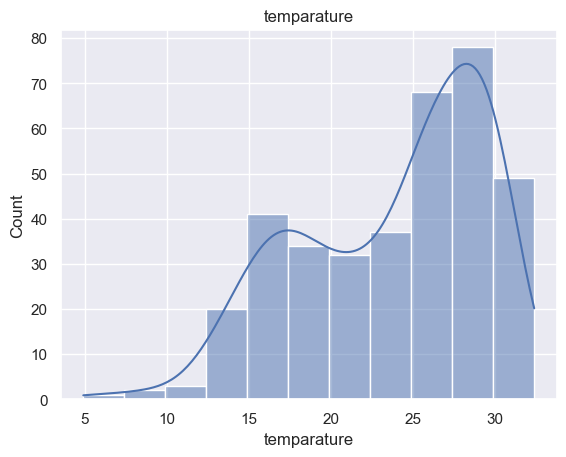

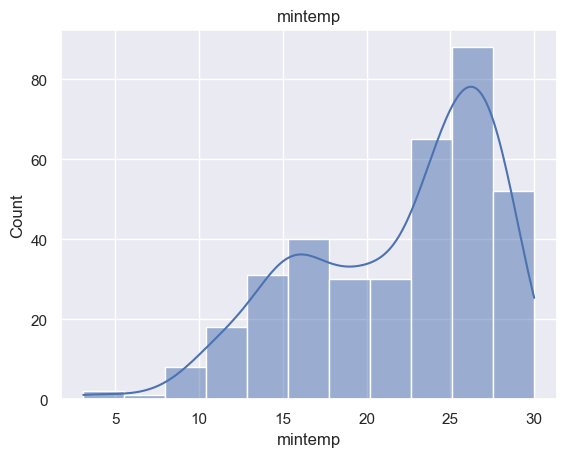

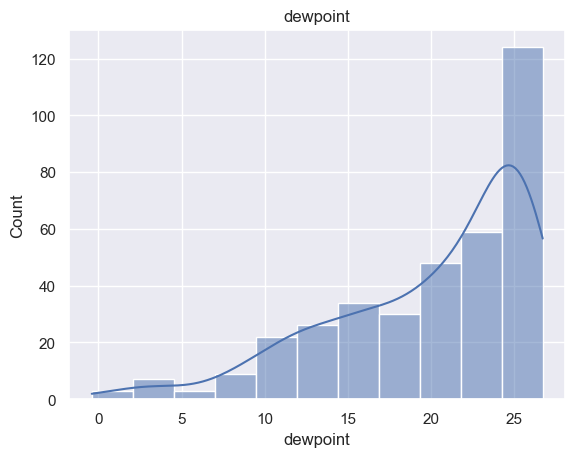

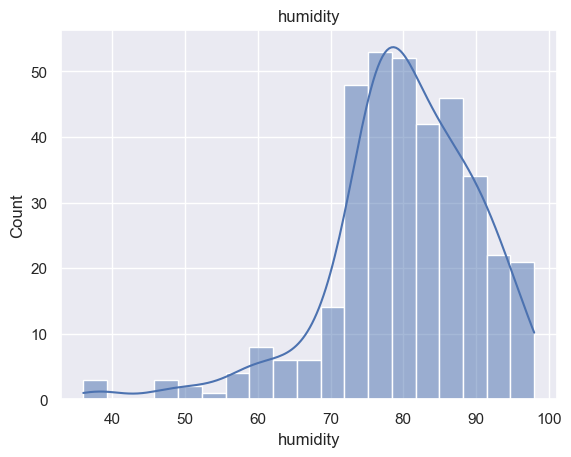

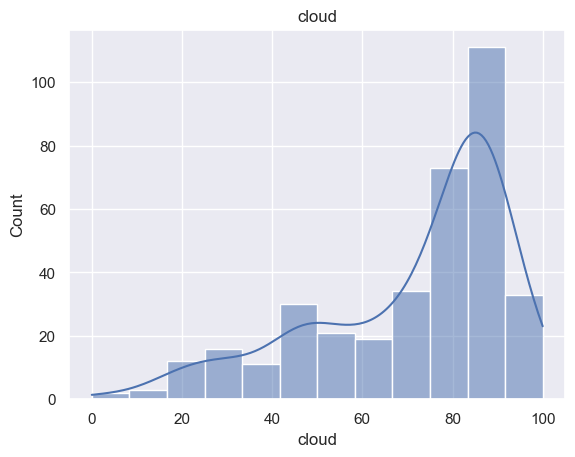

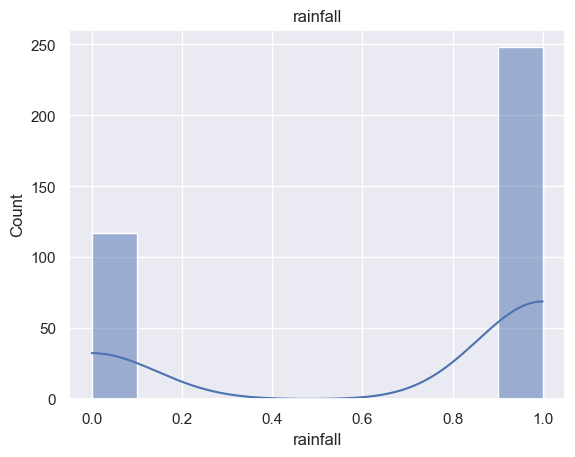

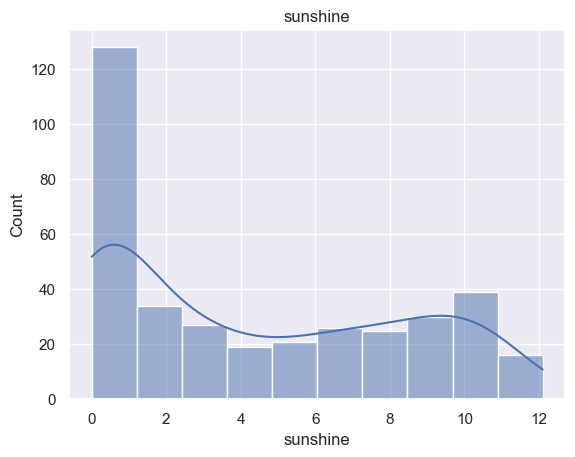

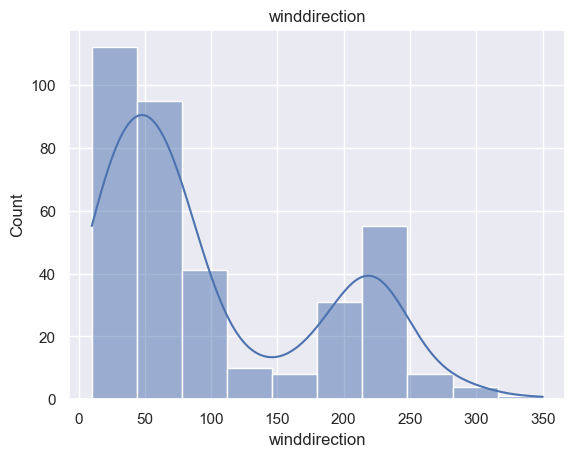

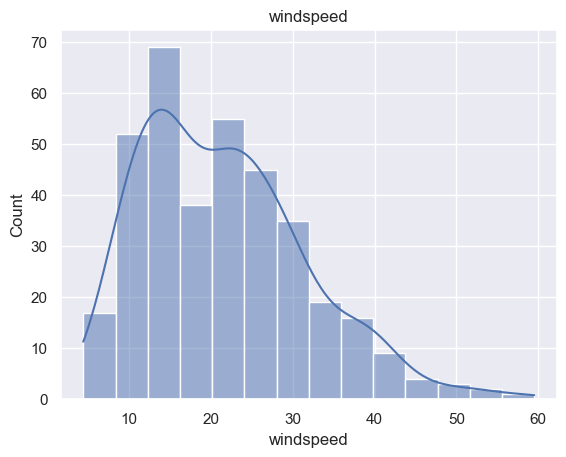

In [97]:
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col}")
    plt.show()

<Axes: xlabel='rainfall', ylabel='count'>

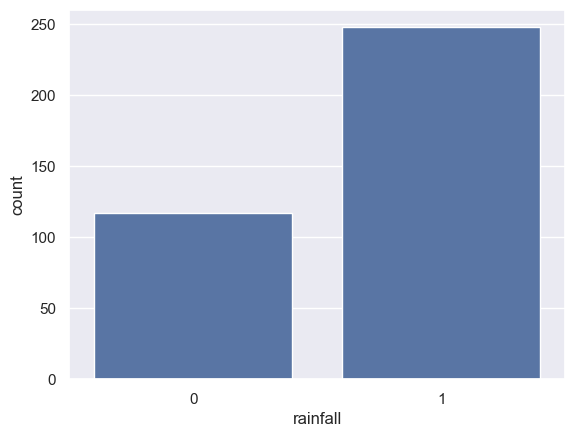

In [99]:
sns.countplot(x='rainfall' , data=df)


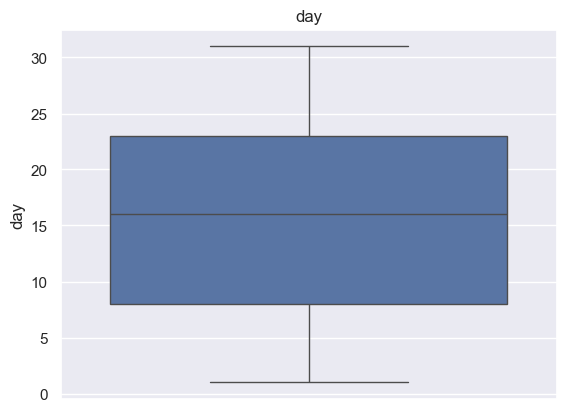

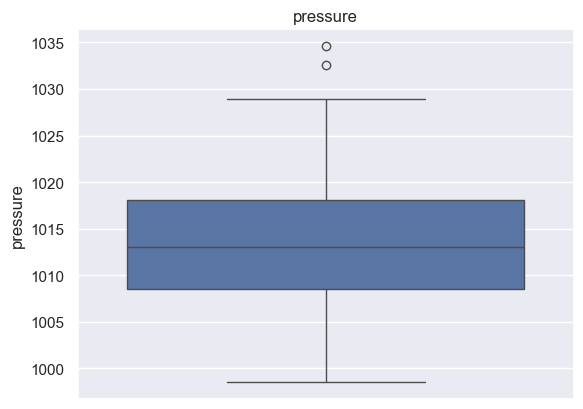

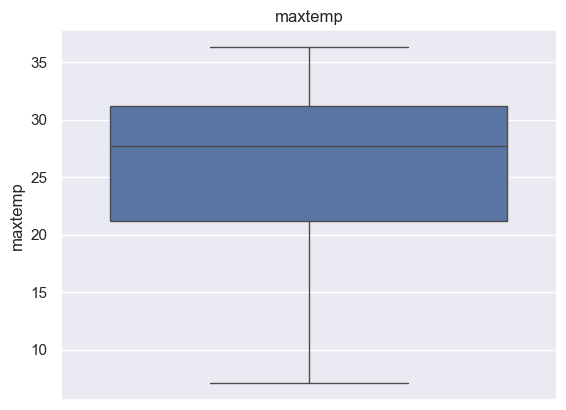

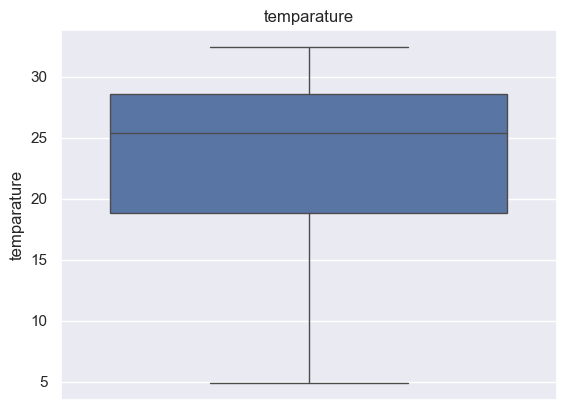

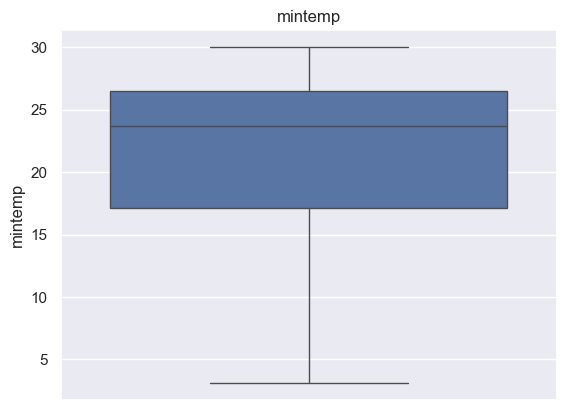

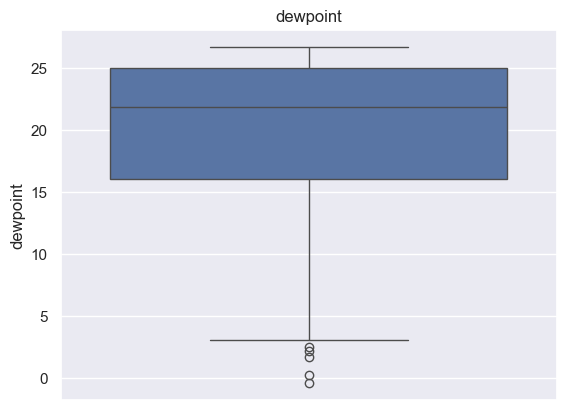

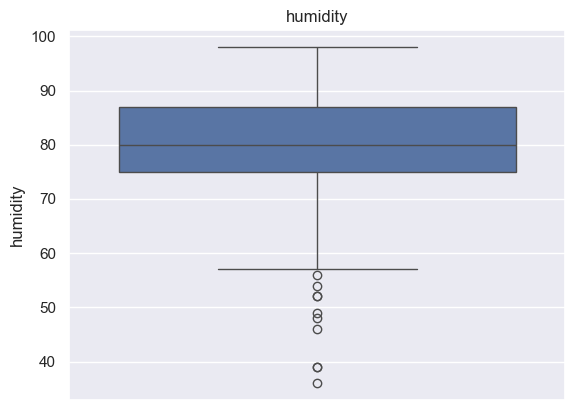

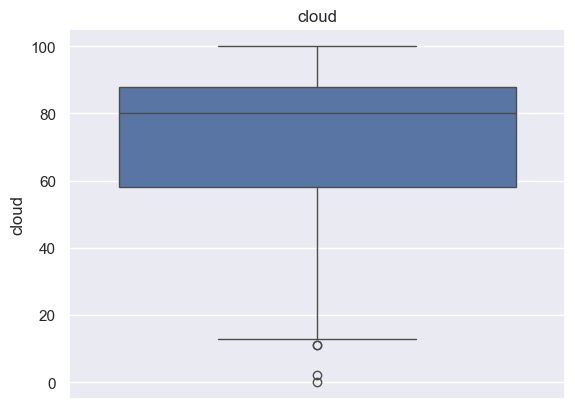

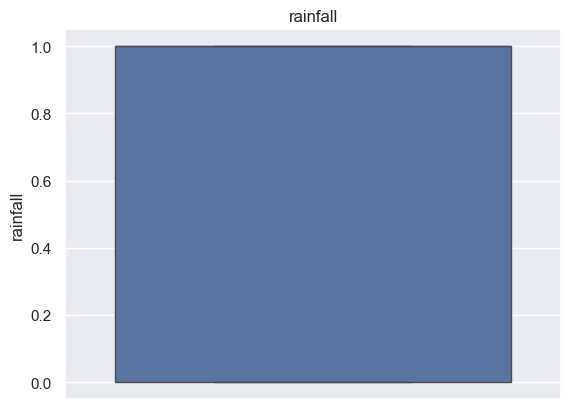

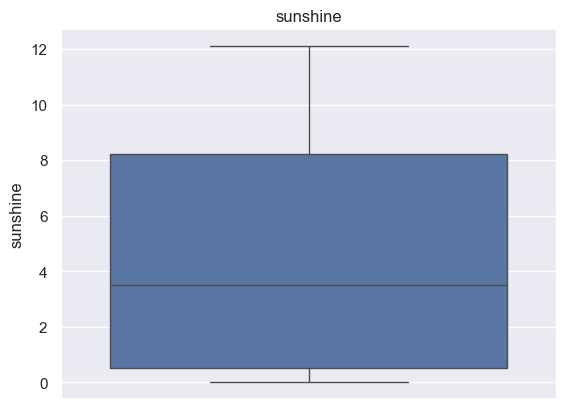

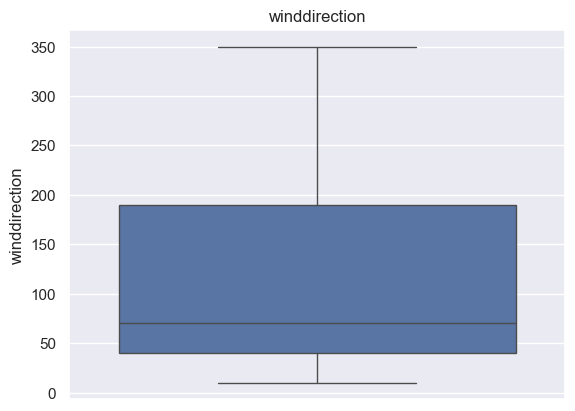

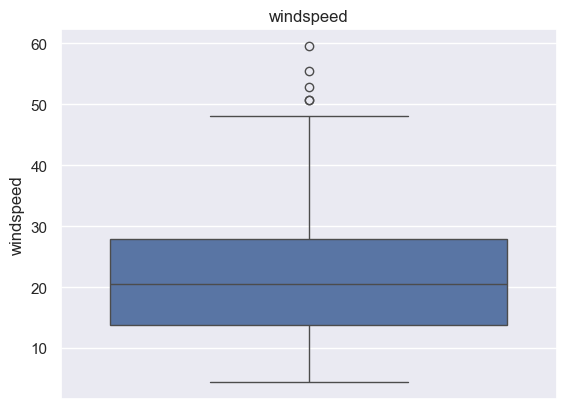

In [103]:
for col in numerical_cols:
    sns.boxplot(df[col])
    plt.title(f"{col}")
    plt.show()

In [105]:
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['humidity'] >= lower) & (df['humidity'] <= upper)]


In [107]:
Q1 = df['dewpoint'].quantile(0.25)
Q3 = df['dewpoint'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['dewpoint'] >= lower) & (df['dewpoint'] <= upper)]


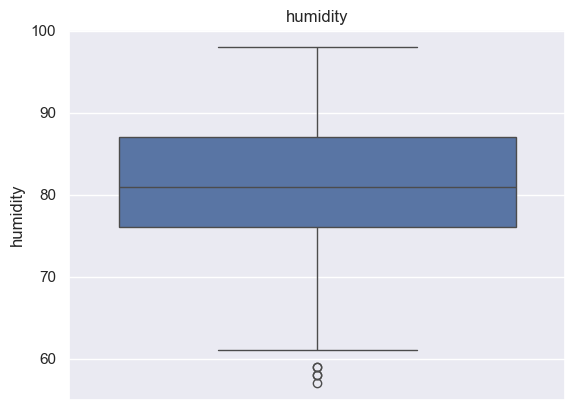

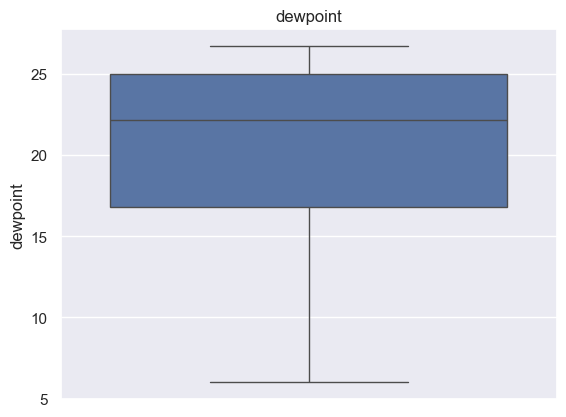

In [109]:
for col in ['humidity', 'dewpoint']:
    sns.boxplot(df[col])
    plt.title(f"{col}")
    plt.show()

In [113]:
df = df.drop(columns=['mintemp', 'maxtemp', 'temparature'])
df

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...
361,27,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,13.3,78,86,1,1.2,20.0,20.9


In [115]:
df['rainfall'].value_counts()

rainfall
1    245
0    107
Name: count, dtype: int64

In [119]:
majority = df[df.rainfall == 1]
minority = df[df.rainfall == 0]

In [121]:
majority

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...
359,25,1020.4,13.5,75,89,1,0.7,10.0,27.6
361,27,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,13.3,75,78,1,4.6,70.0,33.4


In [123]:
minority

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
6,7,1021.8,15.0,79,56,0,3.4,30.0,21.5
7,8,1020.8,14.4,78,28,0,7.7,60.0,14.3
8,9,1020.6,14.3,78,79,0,3.3,70.0,39.3
11,12,1019.9,13.7,79,86,0,0.6,20.0,23.9
12,13,1020.8,12.1,77,34,0,9.1,30.0,24.4
...,...,...,...,...,...,...,...,...,...
345,11,1016.4,15.5,76,72,0,6.3,60.0,20.7
346,12,1016.2,17.1,83,88,0,0.2,70.0,39.5
353,19,1025.4,8.7,62,71,0,2.1,30.0,29.0
360,26,1020.6,13.3,74,87,0,0.6,30.0,21.6


In [127]:
majority_df = majority.sample(n=107)
majority_df

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
136,16,1011.2,19.4,73,69,1,7.2,10.0,21.9
348,14,1016.6,17.3,82,84,1,0.4,50.0,20.3
359,25,1020.4,13.5,75,89,1,0.7,10.0,27.6
31,1,1022.2,11.2,93,96,1,0.0,20.0,31.9
14,15,1015.4,14.6,97,97,1,0.0,50.0,37.5
...,...,...,...,...,...,...,...,...,...
364,30,1025.3,13.3,78,86,1,1.2,20.0,20.9
21,22,1018.9,12.9,92,100,1,0.0,50.0,35.3
297,24,1015.0,22.1,76,61,1,8.2,80.0,19.7
110,20,1014.6,19.5,88,89,1,0.2,40.0,20.9


In [129]:
final_df = pd.concat([majority_df, minority])
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,27,1008.2,25.0,85,81,1,2.5,90.0,15.1
1,13,1005.0,26.1,87,82,1,2.2,160.0,12.6
2,20,1014.7,17.4,91,96,1,0.0,50.0,28.0
3,25,1020.4,13.5,75,89,1,0.7,10.0,27.6
4,27,1024.1,8.4,58,19,0,11.1,30.0,14.6
...,...,...,...,...,...,...,...,...,...
209,10,1013.7,19.9,77,85,1,0.6,20.0,30.2
210,1,1014.5,19.5,86,83,0,3.6,50.0,8.3
211,11,1008.6,20.6,75,62,0,8.8,80.0,26.0
212,19,1007.7,25.7,77,59,0,10.4,230.0,16.6


In [131]:
final_df['rainfall'].value_counts()

rainfall
1    107
0    107
Name: count, dtype: int64

In [137]:
X = final_df.drop('rainfall', axis=1)
y = final_df['rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.81      0.74      0.77        23

    accuracy                           0.77        43
   macro avg       0.77      0.77      0.77        43
weighted avg       0.77      0.77      0.77        43



In [147]:
param_grid = {
    'n_estimators': [100, 200, 300],              # number of trees
    'max_depth': [None, 10, 20, 30],              # depth of tree
    'min_samples_split': [2, 5, 10],              # min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                # min samples required at a leaf node
    'max_features': ['sqrt', 'log2'],             # number of features to consider when looking for best split
    'bootstrap': [True, False],                   # whether bootstrap samples are used
    'criterion': ['gini', 'entropy']              # splitting criterion
}

rf1 = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=5,scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [149]:
best_rf = grid.best_estimator_
print("best parameters", grid.best_params_)

best parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [151]:
best_rf

RandomForestClassifier(bootstrap=False, criterion='entropy', min_samples_leaf=2,
                       random_state=42)

In [153]:
y_pred_1 = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_1))


              precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.79      0.65      0.71        23

    accuracy                           0.72        43
   macro avg       0.73      0.73      0.72        43
weighted avg       0.73      0.72      0.72        43



In [157]:
np.mean(cross_val_score(best_rf, X_train, y_train, cv=5))

0.7729411764705881